# **Finance & Accounting Courses - Udemy (13K+ course)**
## A través de histogramas (histograms), caja y bigotes (boxplot), diagrama de dispersión (scatterplot) observaremos el comportamiento de las variables y propondremos un curso que cumpla con las mejores expectativas! 
### *Autor Daniel Guardia* 🤖

In [1]:
#importas librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches

#Importas el Dataset

df=pd.read_csv("udemy_output_All_Finance__Accounting_p1_p626.csv")
df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [8]:
# Conocemos nuestra data! 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [2]:
#Limpieza
df=df.drop_duplicates()

In [27]:
#Rápido análisis descriptivo
df.describe().round(2)


,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,13608.00,13608.00,13608.00,13608.00,13608.00,13608.00,13608.00,13608.00,12205.00,13111.00
mean,1681720.80,2847.01,3.92,3.91,3.91,243.17,32.22,0.11,493.94,4646.99
std,953927.05,9437.87,1.03,1.04,1.04,1580.97,42.77,0.62,267.83,3109.10
min,2762.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,455.00,1280.00
25%,858086.25,62.00,3.80,3.79,3.79,7.00,12.00,0.00,455.00,1600.00
50%,1623421.00,533.00,4.19,4.18,4.18,24.00,21.00,0.00,455.00,3200.00
75%,2503720.50,2279.50,4.45,4.45,4.45,87.00,37.00,0.00,455.00,8640.00
max,3486006.00,374836.00,5.00,5.00,5.00,78006.00,699.00,6.00,3200.00,12800.00


# ¿Es este data set un conjunto de cursos bien aceptados por los consumidores como para realiar un análisis?

## A través de un histograma podremos ver cuál la puntuación(es) que frecuentemente reciben estos cursos

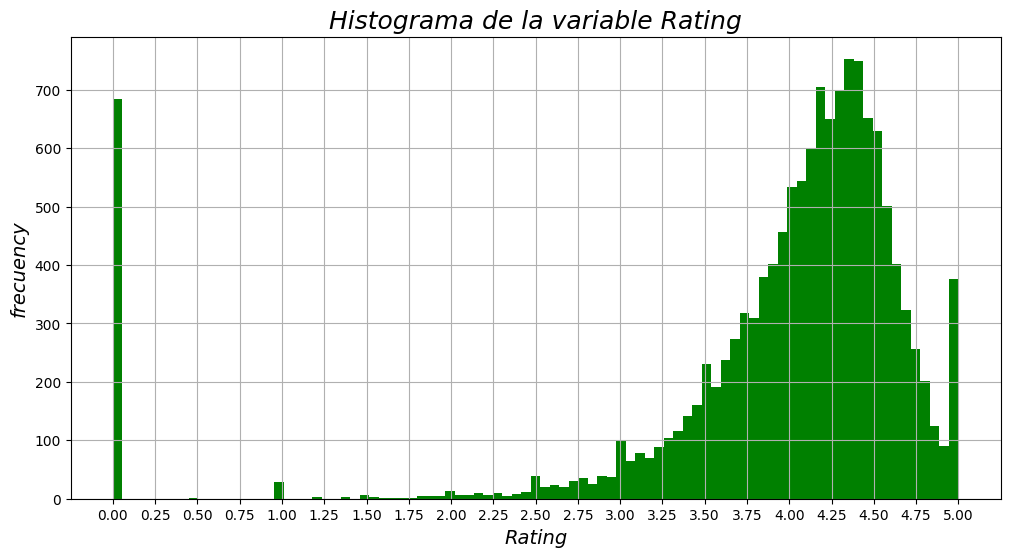

In [84]:
# Antes de hacer un histograma usamos la  convención de Freedman-Diaconis
iqr_data_rating = df["rating"].quantile(0.75) - df["rating"].quantile(0.25)
#hallamos el  número de bins recomendados
bins_definition = int((max(df["rating"]) - min(df["rating"])) / (2 * iqr_data_rating/(len(df["rating"])**(1/3))))
#Con matoplotlib.pytlot damos forma
fig,ax=plt.subplots(figsize=(12,6))
#ejectuamos el histograma
histogram_rating= df["rating"].hist(bins=bins_definition, color="green")
#histogram_rating.set_tittle("Histograma")
ax.set_ylabel("frecuency",fontsize=14,fontstyle="italic")
ax.set_xlabel("Rating",fontsize=14,fontstyle="italic")
ax.set_title("Histograma de la variable Rating",fontsize=18, fontstyle='italic')
# para darle espaciado al  eje x (abscisas)
ax.set_xticks(np.arange(0, max(df["rating"]) + 0.25, 0.25))


### Gracias al histograma podemos ver que la  mayoría de los cursos están valorados desde 4 a 4.5, lo cual es una considerable calificación para los  cursos.

# Habiendo entendido que este dataset provee de cursos con altas apreciaciones de los usuarios es necesario preguntarnos algo que nos interesa a la mayoría. ¿Este conjunto de cursos son de paga?

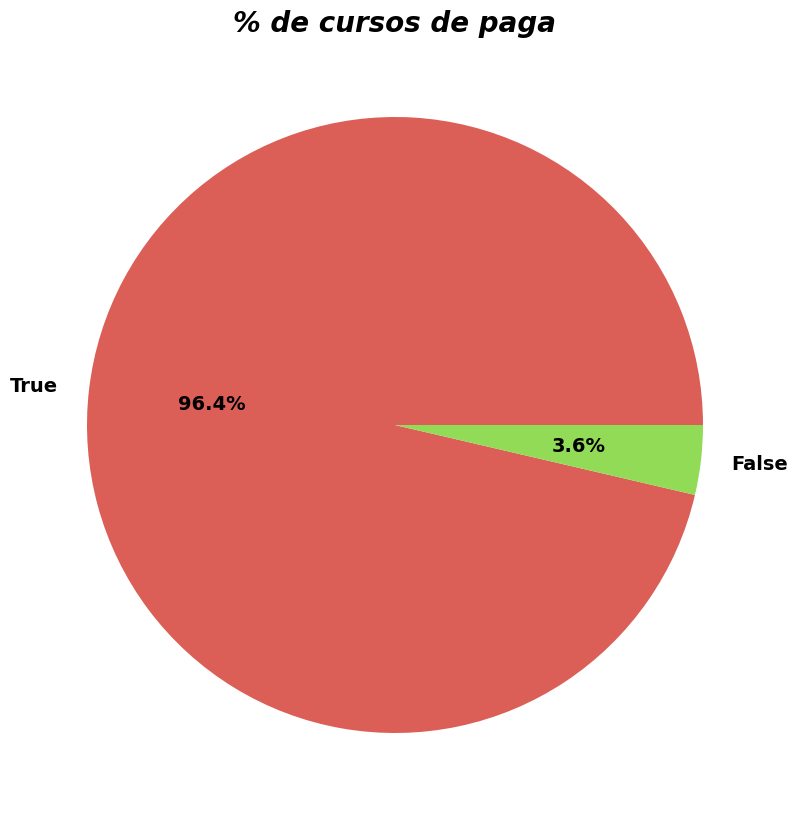

In [67]:
ispaid_count=df["is_paid"].value_counts()
# percentages_pie=ispaid_count/len(df)*100
fig,ax=plt.subplots(figsize=(16,10))
color=sns.color_palette("hls",4)
piechart=ispaid_count.plot(kind="pie",colors=color,autopct='%1.1f%%')
ax.set_title("% de cursos de paga",fontsize=20,fontstyle="italic",weight="bold")
ax.set_ylabel("")
for text in piechart.texts:
    text.set_fontsize(14)
    text.set_weight("bold")






### Como  todo lo bueno en la  vida, gran mayoria de estos cursos son de paga.

# Para profundizar más con la variable "rating" vamos a ahondar  haciendo un scatter plot para ver como se comporta dicha variable en contraste con el número de suscriptores del curso

la correlación de estas 2 variables es 0.08 positiva


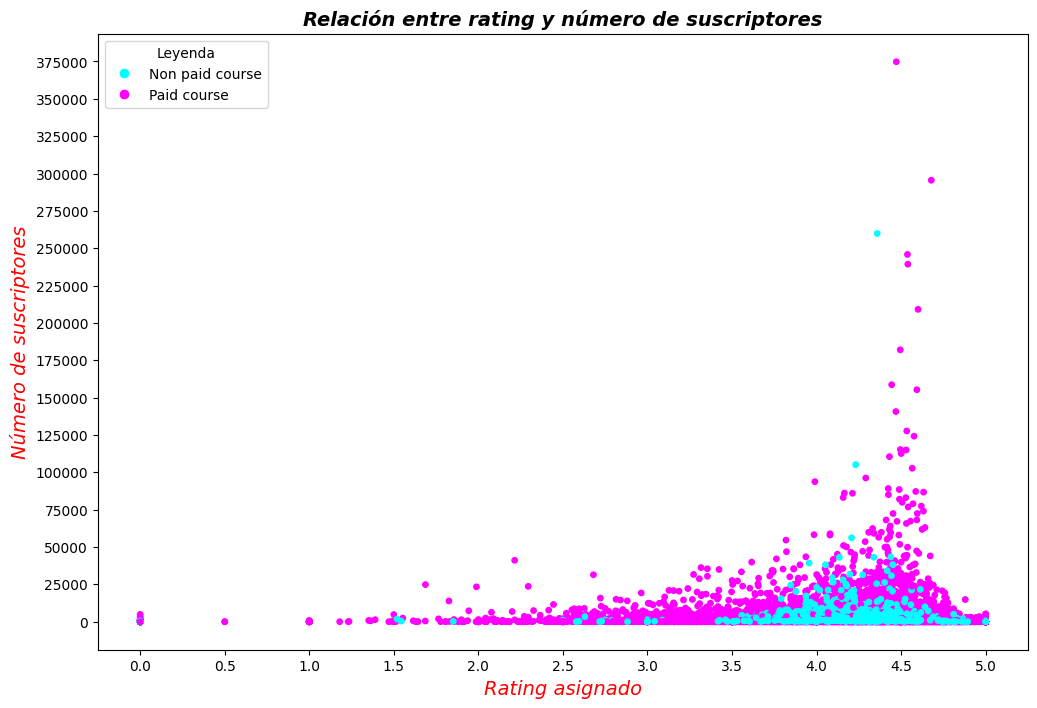

In [19]:
fig,ax=plt.subplots(figsize=(12,8))
scatterplot1=plt.scatter( x=df["rating"],y=df["num_subscribers"],c=df["is_paid"], cmap='cool', s=15)
plt.xlabel("Rating asignado",fontsize=14,color="red",fontstyle="italic")
plt.ylabel("Número de suscriptores",fontsize=14,color="red",fontstyle="italic")
#editando el  eje y
ax.set_yticks(np.arange(0,max(df["num_subscribers"])+25000,25000))
#editando el  eje x
ax.set_xticks(np.arange(0,max(df["rating"])+0.5,0.5))
# Asignar etiquetas personalizadas a la leyenda
handles, labels = scatterplot1.legend_elements(prop="colors")
labels = ["Non paid course","Paid course"]
plt.legend(handles, labels, loc="upper left", title="Leyenda")
plt.title("Relación entre rating y número de suscriptores",fontsize=14,weight="bold",fontstyle="italic")


# Calcular coeficiente de correlación
corr_matrix = np.corrcoef(x=df["rating"], y=df["num_subscribers"])
corr = corr_matrix[0, 1]
print(f'la correlación de estas 2 variables es {corr.round(2)} {"positiva" if corr > 0 else "negativa"}')


### El diagrama de dispersión permite ver que un número mayor de suscripciones no garantiza un mejor rating del curso. Asímismo, un mejor rating del curso no garantiza mayor número de suscripciones. **Sin embargo, podemos decir que todo aquel curso que tenga más de 75 mil suscriptores se encontrará en el rango de 4 a 5 puntos de rating brindándo así, una primera característica interesante al momento de tomar un curso de estos.**

## Ahora sabiendo una característica importante al momento de escoger un curso, y reconociendo que gran mayoría de estos cursos son de paga, es más que importante conocer la distribución de los precios de dichos cursos a través de un gráfico de cajas y bigotes (boxplot)

In [23]:
pricedetail=df["price_detail__amount"].unique()
pricedetail

array([ 8640.,  5760.,  1280.,  9280.,  2560.,  4800.,  6720.,  2240.,
        1920., 10240.,  3200.,  8960.,  6400.,  7040.,  9600., 12800.,
        7680.,  2880.,  4480.,  5440.,  1600.,  6080.,  3520.,  8320.,
        7360.,  4160.,  8000.,  3840.,  5120., 12160., 11520.,  9920.,
       11840., 12480., 10560., 11200.,    nan, 10880.])

### Antes de ejecutar la distribución de los datos, observamos que existen valores NaN  (not  a number) en la columna "price_detail_amount" por lo que reemplazaremos dichos datos con valor 0 ya que ese NaN corresponde a los cursos gratuitos.

In [3]:
#reemplazando valor Nan por el promedio 
df["price_detail__amount"]=df["price_detail__amount"].fillna(0)

Text(0, 0.5, 'frecuency')

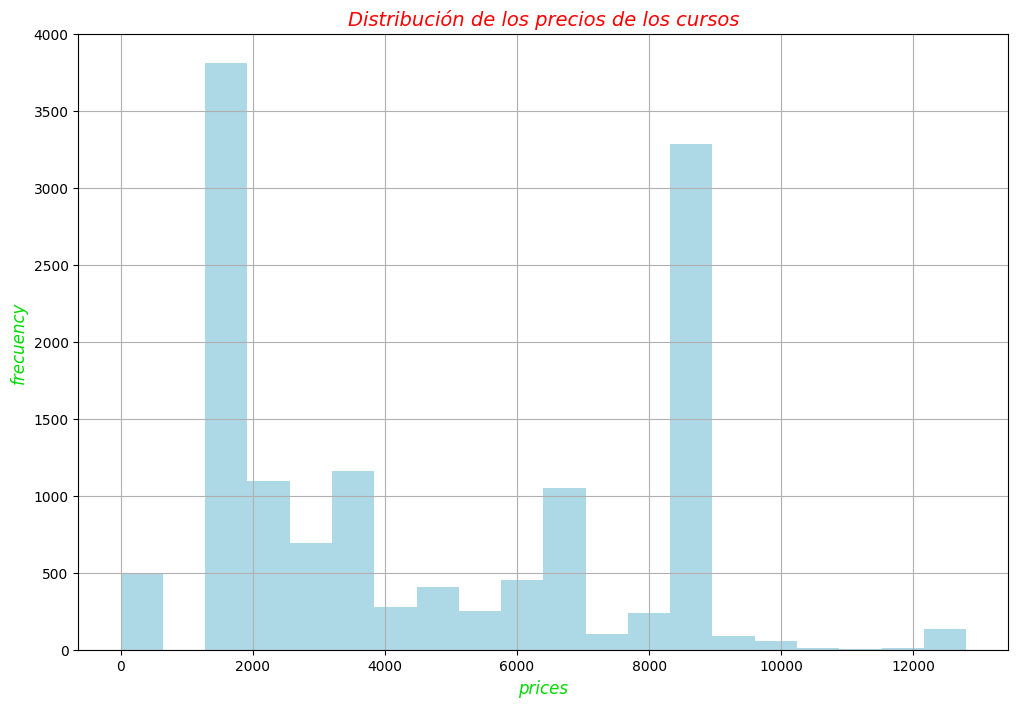

In [4]:
#antes de hacer un boxplot,hagamos un histograma que permita ver la distribución de nuestros datos
fig,ax=plt.subplots(figsize=(12,8))
#hallemos el número de bins adecuados
iqr_price=df["price_detail__amount"].quantile(0.75) - df["price_detail__amount"].quantile(0.25)
bins_decision= int((max(df["price_detail__amount"]) - min(df["price_detail__amount"]))/(2*iqr_price / (len(df["price_detail__amount"])**(1/3))))
histograma_precio=df["price_detail__amount"].hist(bins=bins_decision,color="lightblue")
ax.set_title("Distribución de los precios de los cursos",fontstyle="italic",fontsize=14,color="red")
ax.set_xlabel("prices",fontstyle="italic",fontsize=12,color=(0, 220/255, 0))
ax.set_ylabel("frecuency",fontstyle="italic",fontsize=12,color=(0, 220/255, 0))

In [16]:
df["price_detail__amount"].describe()




count    13608.000000
mean      4646.992872
std       3051.792396
min       1280.000000
25%       1600.000000
50%       3840.000000
75%       8640.000000
max      12800.000000
Name: price_detail__amount, dtype: float64

### Podemos ver que esta data no se encuentra distribuida uniformemente. Si quisieramos hacer preprocesamiento de datos para machine learning debemo tener en cuenta que habría que usar  escalamiento NO lineal para convertir, valga la redundancia , a lineal mediante logartimos,sigmoides o polinomiales para finalmente normalizary dejar lista la data.

Dato que este análisis es meramente EDA  (exploratory descriptive analysis) evitaremos ello

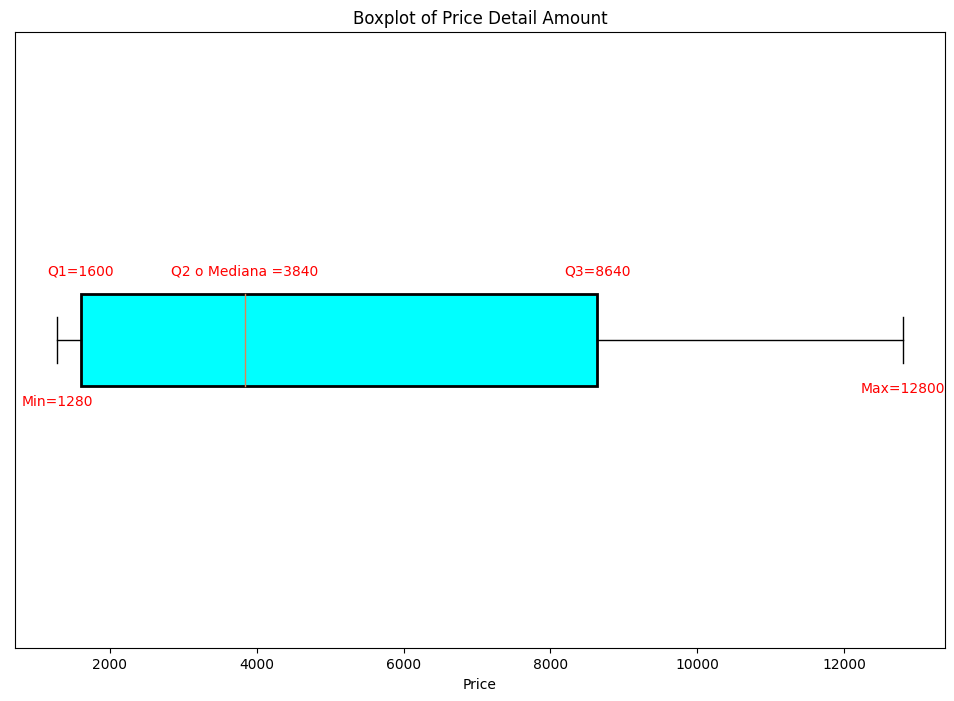

In [134]:

#establecemos tamaño de figura
fig,ax=plt.subplots(figsize=(12,8))
box_props = dict(facecolor='cyan', color='black',linewidth=2)
ax.boxplot(df["price_detail__amount"], vert=False,patch_artist=True, boxprops=box_props)

#edición de gráfica

quartil1=np.percentile(df["price_detail__amount"],25)
quartil2=np.percentile(df["price_detail__amount"],50)
quartil3=np.percentile(df["price_detail__amount"],75)
max_val=np.max(df["price_detail__amount"])
min_val=np.min(df["price_detail__amount"])

ax.text(quartil1,1.1,f'Q1={quartil1:.0f}',ha="center",va="bottom", color="red")
ax.text(quartil2,1.1,f'Q2 o Mediana ={quartil2:.0f}',ha="center",va="bottom", color="red")
ax.text(quartil3,1.1,f'Q3={quartil3:.0f}',ha="center",va="bottom", color="red")
ax.text(max_val,0.91,f'Max={max_val:.0f}',ha="center",va="bottom", color="red")
ax.text(min_val,0.889,f'Min={min_val:.0f}',ha="center",va="bottom", color="red")

ax.set_xlabel("Price")
ax.set_ylabel("")
ax.set_yticks([])
ax.set_title("Boxplot of Price Detail Amount")
plt.show()



### En primer lugar vemos que existe sesgo en los datos porque la media no es equidistante de quartil1 y quartil 3.  El 50% de los cursos está en un intervalo de 1600 a 8640 rupias (INR) es decir de 73.52 a 397.01 soles (PEN). Ya que buscamos recomendar un curso de costo promedio que aporte valor al estudiante, comprobaremos la relación que existe entre el precio con el rating obtenido para ir estrechando aún más la recomendación.

la correlación de estas 2 variables es 0.11 positiva


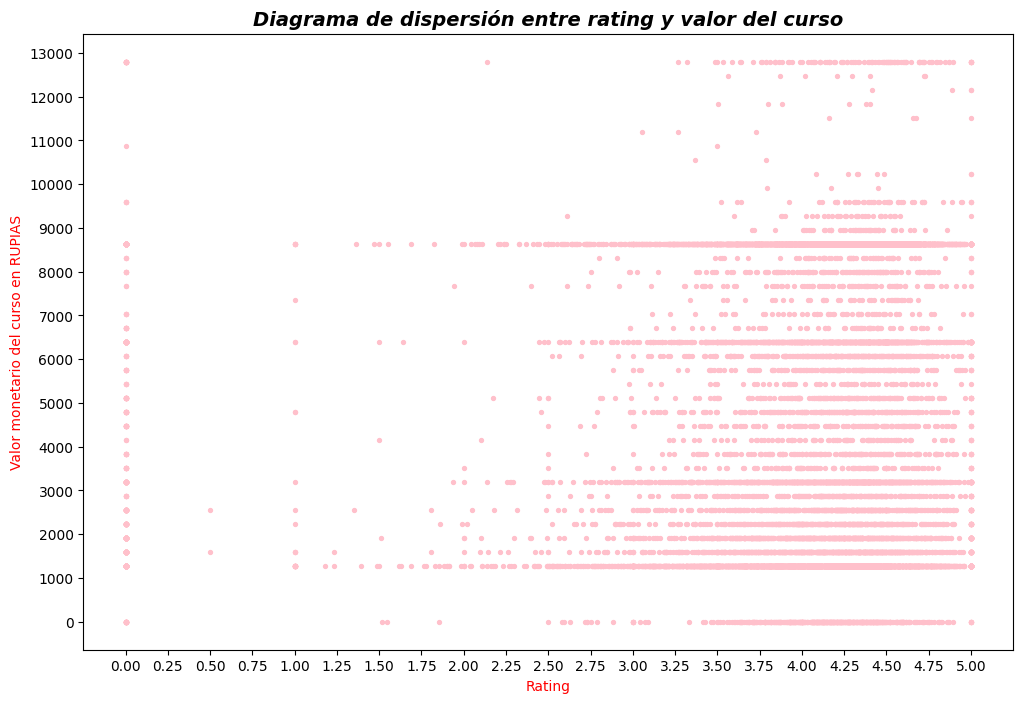

In [5]:
fig,ax=plt.subplots(figsize=(12,8))
scatter_price=plt.scatter(x=df["rating"],y=df["price_detail__amount"],color="pink",s=8)
#editando el gráfico
ax.set_xlabel("Rating", color="red")
ax.set_ylabel("Valor monetario del curso en RUPIAS",color="red")
ax.set_xticks(np.arange(0,max(df["rating"])+0.25,0.25))
ax.set_yticks(np.arange(0,max(df["price_detail__amount"])+1000,1000))
ax.set_title("Diagrama de dispersión entre rating y valor del curso",fontsize=14,color="black",fontstyle="italic",weight="bold")

#hallando el coeficiente de correlación
corr_matrix2=np.corrcoef(x=df["rating"],y=df["price_detail__amount"])
corr2=corr_matrix2[0,1]
print(f'la correlación de estas 2 variables es {corr2.round(2)} {"positiva" if corr2 > 0 else "negativa"}')


### Nuevamente estamos frente a un par de variables que no tienen un alto grado de correlación. A primera vista, si cercamos la gráfica entre el 1er cuartil 1600 y el 3er cuartil 8640 encontramos que existe distintas valoraciones por lo que no habría certeza de que por ser más caro, el curso tendrá una mejor valoración.  Si observamos los precios de los cursos por debajo del primer cuartil x <1600, existen cursos con valoraciones de hasta 5 puntos. No obstante observamos que , de poder emplearse un poco más dinero, x>9000 , dicha inversión podría retornar con  gran probabilidad un rating mayor a 3.1.

# **CONCLUSIÓN**

### Desde un inicio, nos cercioramos de que el data  set proveyera de cursos de valor significativo, un histograma permitió entender que la mayoría de cursos estaban entre 4.2 y 4.52 en calificación de rating por lo que nos atrevimos a seguir con el análisis. Comprobamos también que existe una mínuscula parte de estos cursos que no  tienen costo, la gran mayoría son de pago.

### Con diagramas de dispersión podemos dar ciertas características que proveeran de cierta certeza al momento de escoger un curso:

### - Si el curso posee más de 75 suscriptores el grado de satisfacción o rating a recibir será de 4 a 5 puntos.
### - Considerando que la mayoría de cursos son de paga, quisimos dar recomendaciones sobre el gasto , por lo que analizamos el precio con el rating, descubriendo que no existe una fuerte relación entre estas 2 variables, pero sí pudimos identificar que si el valor invertido en el curso es mayor a 9000 RUPIAS es decir 413.55 soles , existe muchísima certeza de que el rating del curso sea mayor a 3.1.
